In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import time
from IPython import display

# Implementando K-Means manualmente

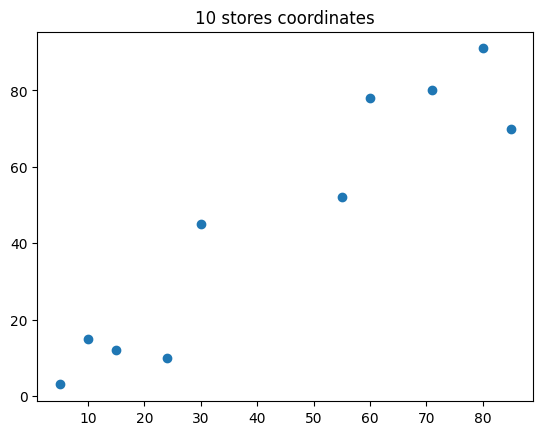

In [2]:
points = np.array([[5, 3], [10, 15], [15, 12], [24, 10], [30, 45], [85, 70], [71, 80], [60, 78], [55, 52], [80, 91]])

xs = points[:, 0]
ys = points[:, 1]

plt.title('10 stores coordinates')
plt.scatter(x=xs, y=ys);

Nosso problema em clusterização é determinar quais pontos representam uma mesma entidade (fazem parte de um mesmo grupo) através de uma medida de similaridade; a similaridade geralmente é definida pela distância entre 2 pontos, de modo que, pontos que estão próximos entre si possuem maiores chances de pertencer ao mesmo grupo, uma vez que eles possuem uma alta similaridade.

Inicialmente, não sabemos o número de grupos que nosso conjunto de dados possui. Olhando pela imagem podemos supor que é possível segmentar os dados em grupos: um no canto inferior esquerdo e outro no canto inferior direito. Tendo escolhido o número de clusters que será criado, podemos escolher aleatóriamente 2 pontos no conjunto de dados $P_1$ e $P_2$, e determinar o cluster que os demais pontos pertencem em relação a similaridade em relação à esses pontos, ou seja, um ponto $P$ qualquer será atribuído ao cluster definido pelo ponto mais próximo entre $P_1$ e $P_2$.

In [3]:
# primeiramente vamos selecionar 2 pontos para serem os representantes dos 2 grupos
g1 = points[0] # (5, 3)
g2 = points[1] # (10, 15)

Dados os pontos $P_1 = (a_1, b_1)$ e $P_2 = (a_2, b_2)$, podemos determinar a distância entre o ponto $P_k = (a_k, b_k)$ e eles pela fórmula da distância Euclideana:

* Distância entre $P_k$ e $P_1$: $\;\;d(P_k, P_1) = \sqrt{(a_k - a_1)^{2} + (b_k - b_1)^{2}}$


* Distância entre $P_k$ e $P_2$: $\;\;d(P_k, P_2) = \sqrt{(a_k - a_2)^{2} + (b_k - b_2)^{2}}$

**Primeira Iteração**

In [4]:
points_in_g1 = []
points_in_g2 = []
group = []

for p in points:
    # coordenadas do ponto p
    x1, y1 = p[0], p[1]
    
    # distancia euclideana entre o ponto p e o centro dos clusters definido por g1 e g2
    euclidean_distance_g1 = np.sqrt( (x1 - g1[0])**2 + (y1 - g1[1])**2 )
    euclidean_distance_g2 = np.sqrt( (x1 - g2[0])**2 + (y1 - g2[1])**2 )
    
    # atribui o ponto p ao cluster de menor distancia 
    if euclidean_distance_g1 < euclidean_distance_g2:
        points_in_g1.append(p)
        group.append(1)
        
    else:
        points_in_g2.append(p)
        group.append(2)

In [5]:
print('points_in_g1 = {}\n'.format(points_in_g1))
print('points_in_g2 = {}\n'.format(points_in_g2))
print('groups: {}'.format(group))

points_in_g1 = [array([5, 3])]

points_in_g2 = [array([10, 15]), array([15, 12]), array([24, 10]), array([30, 45]), array([85, 70]), array([71, 80]), array([60, 78]), array([55, 52]), array([80, 91])]

groups: [1, 2, 2, 2, 2, 2, 2, 2, 2, 2]


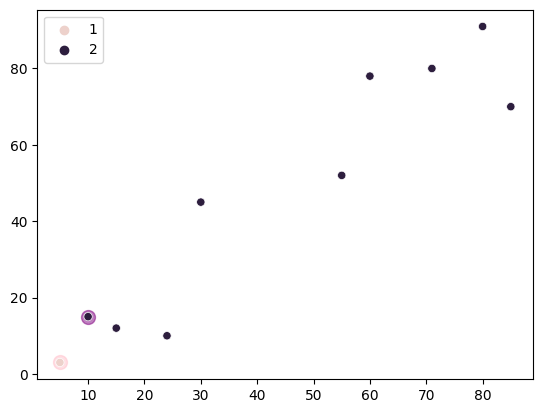

In [7]:
import seaborn as sns

plt.scatter(x=g1[0], y=g1[1], color='pink',   s=100, alpha=0.5)
plt.scatter(x=g2[0], y=g2[1], color='purple', s=100, alpha=0.5)

sns.scatterplot(x=xs, y=ys, hue=group);

Vemos obtemos um resultado bastante ruim, apenas o próprio ponto $P_1$ foi atribuído ao cluster definido por ele. Uma tentativa de consertar esse problema seria utilizar os pontos atribuídos a cada cluster nessa primeira iteração para calcular os novos centroides, isso é, a nova localização do centro de cada grupo.

$P_{center} = \frac{1}{N}\sum_{i}^{N}P_i$

Posição do centro do cluster 1 [5.0, 3.0]
Posição do centro do cluster 2 [47.77777777777778, 50.333333333333336]


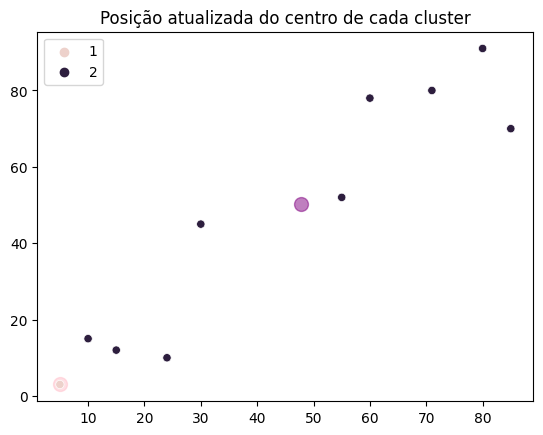

In [10]:
# calcula as coordenadas médias x e y dos pontos pertencentes aos clusters 1 e 2 
g1_center = [np.array(points_in_g1)[:, 0].mean(), np.array(points_in_g1)[:, 1].mean()]
g2_center = [np.array(points_in_g2)[:, 0].mean(), np.array(points_in_g2)[:, 1].mean()]

print(f'Posição do centro do cluster 1 {g1_center}')
print(f'Posição do centro do cluster 2 {g2_center}')

plt.title('Posição atualizada do centro de cada cluster')
plt.scatter(x=g1_center[0], y=g1_center[1], color='pink', s=100, alpha=0.5)
plt.scatter(x=g2_center[0], y=g2_center[1], color='purple', s=100, alpha=0.5);

sns.scatterplot(x=xs, y=ys, hue=group);

Fazendo uso das novas posições dos centróides, vamos novamente atribuir os pontos ao cluster cujo centróide localizado mais próximo à ele.

**Segunda Iteração**

Para facilitar o processo iterativo, vamos escrever uma função que recebe as posições dos centróides 1 e 2, e atribui cada ponto ao cluster mais próximo.

In [11]:
def assign_points_to_groups(g1_center, g2_center):
    
    points_in_g1 = []
    points_in_g2 = []
    group = []

    for p in points:
        # coordenadas do ponto p
        x1, y1 = p[0], p[1]

        # distancia euclideana entre o ponto p e o centro dos clusters definido por g1 e g2
        euclidean_distance_g1 = np.sqrt( (x1 - g1_center[0])**2 + (y1 - g1_center[1])**2 )
        euclidean_distance_g2 = np.sqrt( (x1 - g2_center[0])**2 + (y1 - g2_center[1])**2 )
        
        # atribui o ponto p ao cluster de menor distancia
        if euclidean_distance_g1 < euclidean_distance_g2:
            points_in_g1.append(p)
            group.append(1)

        else:
            points_in_g2.append(p)
            group.append(2)
            
    return points_in_g1, points_in_g2, group

In [12]:
# atualiza os clusters atribuindo aos pontos
points_in_g1, points_in_g2, group = assign_points_to_groups(g1_center, g2_center)

print('points_in_g1 = {}\n'.format(points_in_g1))
print('points_in_g2 = {}\n'.format(points_in_g2))
print('groups: {}'.format(group))

points_in_g1 = [array([5, 3]), array([10, 15]), array([15, 12]), array([24, 10])]

points_in_g2 = [array([30, 45]), array([85, 70]), array([71, 80]), array([60, 78]), array([55, 52]), array([80, 91])]

groups: [1, 1, 1, 1, 2, 2, 2, 2, 2, 2]


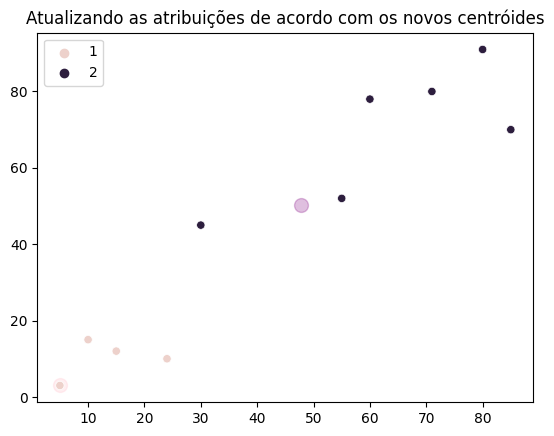

In [14]:
plt.title('Atualizando as atribuições de acordo com os novos centróides')
plt.scatter(x=g1_center[0], y=g1_center[1], color='pink',   s=100, alpha=0.25)
plt.scatter(x=g2_center[0], y=g2_center[1], color='purple', s=100, alpha=0.25);

sns.scatterplot(x=xs, y=ys, hue=group);

Melhoramos bastante o agrupamento em relação ao resultado anterior, mas ainda existe margem para melhoria. Vamos fazer mais iteração, em que calcularemos novamente o centro de cada cluster e em seguida atribuir os pontos ao cluster com o centro mais próximo, para verificar se um ou mais pontos mudará de cluster.

**Terceira Iteração**

Precisamos, dado que a núvem de pontos de cada cluster se alterou, recalcular as novas posições dos centróides. Para facilitar esse processo, escreveremos uma nova função, a qual receberá os pontos que pertencem a cada cluster e retornará a posição de seus respectivos centróides.

In [15]:
def update_centroids(points_in_g1, points_in_g2):
    g1_center = [np.array(points_in_g1)[:, 0].mean(), np.array(points_in_g1)[:, 1].mean()]
    g2_center = [np.array(points_in_g2)[:, 0].mean(), np.array(points_in_g2)[:, 1].mean()]
    
    return g1_center, g2_center

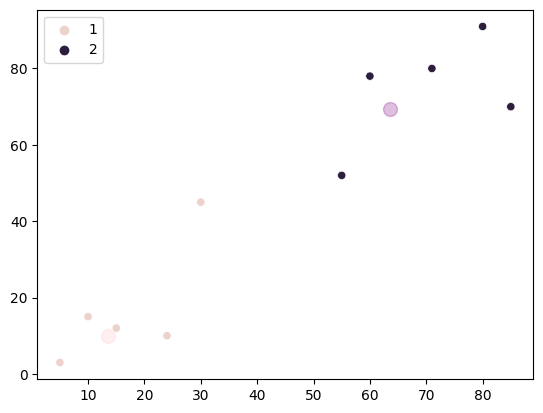

In [16]:
g1_center, g2_center = update_centroids(points_in_g1, points_in_g2)
points_in_g1, points_in_g2, group = assign_points_to_groups(g1_center, g2_center)

plt.scatter(x=g1_center[0], y=g1_center[1], color='pink',   s=100, alpha=0.25)
plt.scatter(x=g2_center[0], y=g2_center[1], color='purple', s=100, alpha=0.25);

sns.scatterplot(x=xs, y=ys, hue=group);

**Quarta Iteração**

Repetiremos o processo mais uma vez para verificarmos se haverá novas mudanças.

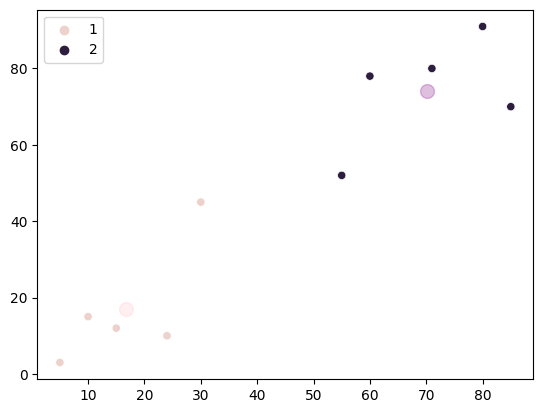

In [17]:
# atualiza a posição dos centróides
g1_center, g2_center = update_centroids(points_in_g1, points_in_g2)

# mapeia os pontos ao cluster cujo centroide esteja mais proximo
points_in_g1, points_in_g2, group = assign_points_to_groups(g1_center, g2_center)

plt.scatter(x=g1_center[0], y=g1_center[1], color='pink',   s=100, alpha=0.25)
plt.scatter(x=g2_center[0], y=g2_center[1], color='purple', s=100, alpha=0.25);

sns.scatterplot(x=xs, y=ys, hue=group);

**Quinta Iteração**

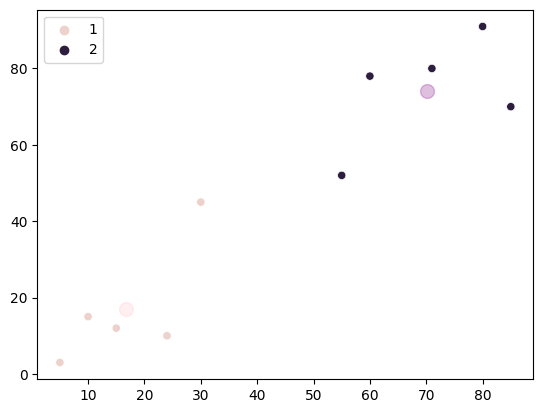

In [18]:
# atualiza a posição dos centróides
g1_center, g2_center = update_centroids(points_in_g1, points_in_g2)

# mapeia os pontos ao cluster cujo centroide esteja mais proximo
points_in_g1, points_in_g2, group = assign_points_to_groups(g1_center, g2_center)

plt.scatter(x=g1_center[0], y=g1_center[1], color='pink',   s=100, alpha=0.25)
plt.scatter(x=g2_center[0], y=g2_center[1], color='purple', s=100, alpha=0.25);

sns.scatterplot(x=xs, y=ys, hue=group);

Percebemos que nenhum ponto mudou de cluster entre a quarta e a quinta iteração. Isso indica que chegamos em um ponto de estabilidade, ou seja, uma vez que nenhum ponto mudará mais de cluster, o centro de cada cluster permancerá sempre no mesmo lugar, de modo os pontos associadas a ele serão os mesmo atribuídos na iteração passada. Portanto podemos concluir que partir desse estado, nenhum ponto mudará mais de cluster e o processo de clusterização chegou ao seu estado final. 

# Visualizando Processo

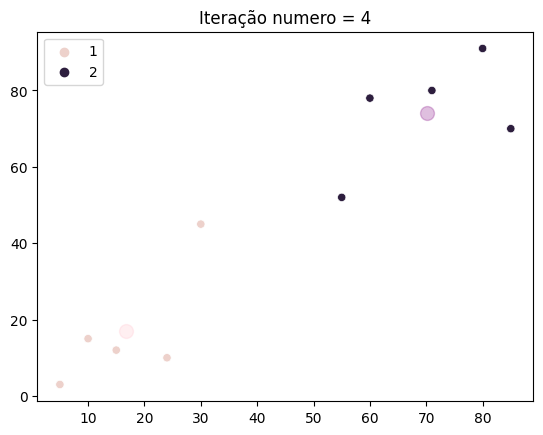

<Figure size 640x480 with 0 Axes>

In [19]:
fig = plt.figure()

# inicializando os centroides em uma posicao aleatoria
g1_center = np.random.randint(0, 10, 2)
g2_center = np.random.randint(0, 10, 2)


for i in range(5):
    
    # atribui pontos ao centroide mais proximo
    points_in_g1, points_in_g2, group = assign_points_to_groups(g1_center, g2_center)
    
    # plot da posicao dos centroides
    plt.scatter(x=g1_center[0], y=g1_center[1], color='pink',   s=100, alpha=0.25)
    plt.scatter(x=g2_center[0], y=g2_center[1], color='purple', s=100, alpha=0.25)
    
    # plot dos pontos segmentado pelos clusters
    sns.scatterplot( x=xs, y=ys, hue=group )
    
    # atualiza a posicao dos centroides
    g1_center, g2_center = update_centroids(points_in_g1, points_in_g2)

    plt.title(f'Iteração numero = {i}')
    
    display.clear_output( wait=True )
    
    plt.show()
    plt.gcf()
    
    time.sleep( 5 )

# Implementando K-Means pelo sklearn

In [20]:
from sklearn.cluster import KMeans

In [22]:
# definicao do modelo
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=42)

# treinamento
kmeans.fit(points)

# cluster atribuido a cada ponto
kmeans.labels_

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int32)

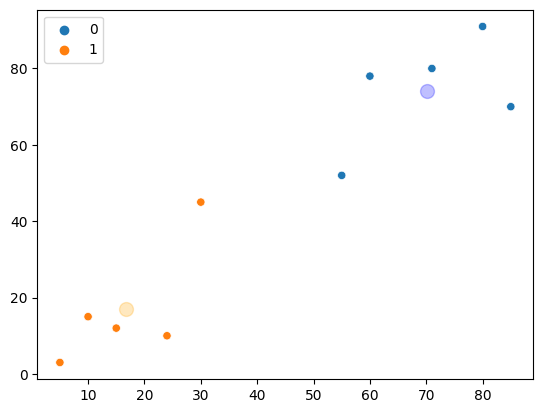

In [27]:
kcenter1, kcenter2 = kmeans.cluster_centers_

plt.scatter(x=kcenter1[0], y=kcenter1[1], color='blue',   s=100, alpha=0.25)
plt.scatter(x=kcenter2[0], y=kcenter2[1], color='orange', s=100, alpha=0.25)

sns.scatterplot(x=xs, y=ys, hue=kmeans.labels_);

In [28]:
kmeans.cluster_centers_

array([[70.2, 74.2],
       [16.8, 17. ]])

# Elbow Method - Escolhendo o melhor número de segmentos

Na seção anterior, implementamos o algoritmo K-Means utilizando 2 cluster; agora vamos ver como o algoritmo segmenta os dados quando aumentamos o números de clusters.

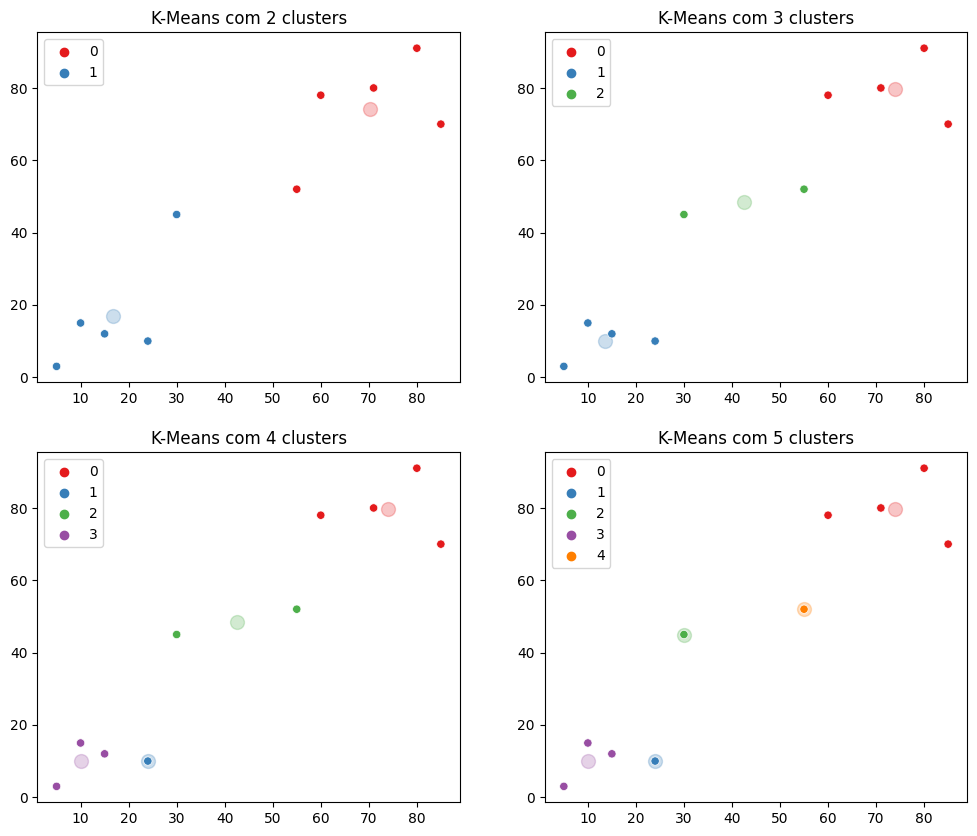

In [107]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, k in zip(axes.reshape(-1), range(2, 6)):
    
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(points)
    
    # define uma paleta de cores
    unique_colors = sns.color_palette('Set1', n_colors=k)
    
    # plota as posicoes dos centroides
    for i in range(k):
        xc, yc = kmeans.cluster_centers_[i]  # coordenadas do i-esimo cluster
        ax.scatter(x=xc, y=yc, s=100, alpha=0.25, c=[unique_colors[i]])

    sns.scatterplot(x=xs, y=ys, hue=kmeans.labels_, palette='Set1', ax=ax)
    
    ax.set_title(f'K-Means com {k} clusters')

Vendo os resultados acima, nos leva ao seguinte questionamento: como escolher o valor de $K$ que resulta no melhor número de clusters?

Para responder essa pergunta vamos introduzir uma métrica chamada **Within Cluster Sum of Squares** ($\text{WCSS}$), a qual mede a dispersão entre os pontos de um mesmo cluster.

Dado o cluster $j$ cujo centróide é dado por $c_{j}$ podemos calcular a dispersão (variância) dos pontos $x_i$ atribuídos a esse cluster através da fórmula:

$\text{WCSS}_{j} = \sum_{i}\|x_i - c_j \|^{2}$

Para calcularmos a dispersão total, basta somarmos os valores de $\text{WCSS}_{j}$ para os $K$ clusters resultantes do treinamento:

$\text{WCSS} = \sum_{j}\text{WCSS}_{j}$

$\text{WCSS} = \sum_{j=1}^{K}\sum_{i}\|x_i - c_j \|^{2}$

Na biblioteca `sklearn` conseguimos acessar o valor de $\text{WCSS}$ através do atributo `.inertia_`. Para verificarmos como esse valor se comporta para diferentes valores de $K$ vamos retreinar o modelo e guardar esses valores em uma variável.

In [110]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(points)
    
    wcss.append(kmeans.inertia_)
    
wcss

[18272.9,
 2964.3999999999996,
 1198.75,
 1051.75,
 714.75,
 498.0,
 190.5,
 113.33333333333334,
 17.0,
 0.0]

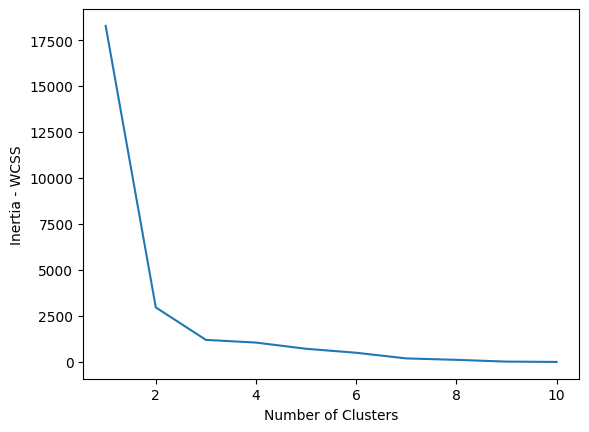

In [116]:
plt.plot(range(1,11), wcss)

plt.xlabel('Number of Clusters')
plt.ylabel('Inertia - WCSS');

O valor de $\text{WCSS}$ também conhecido como inércia é uma medida da dispersão dos pontos em relação ao centro do cluster que eles pertencem. 

Se o valor de inércia é alto, isso significa que os pontos estão dispersos em relação ao centróide e possivelmente uns aos outros, de modo que não conseguimos afirmar com alto grau de certeza que tais pontos são de fatos similares (representam a mesma entidade / pertencem ao mesmo cluster). Se quisermos melhorar a inércia, isso é, diminuir o seu valor, podemos aumentar o número de cluster $K$ definidos inicialmente; desse modo o número de bolhas de pontos aumentará, de forma que os pontos que não se encaixavam bem nos clusters anteriores (e portanto puxavam o valor de $\text{WCSS}$ para cima) serão atribuídos a um a novo cluster, assim, melhorando o seu encaixe e diminuindo a inércia total. 

Em teoria, se quisessémos zerar o valor de inércia, bastaria aumentarmos o número de clusters $K$ o suficiente (conforme podemos notar na lista `wcss` gerada). No entanto, isso não seria nada útil, pois no caso extremo cada cluster seria definido por um único ponto, perdendo assim a capacidade de generalização.

Para contornamos esse problema e selecionar o número ideal clusters $K^{*}$, usamos o chamado **Elbow Method**. Nessa técnica, estamos interessados em determinar o valor de $K$ para o qual as mudanças de inércia a partir dele se torne cada vez mais lenta, ou seja, não haverá quedas acentuadas na dispersão dos dados a partir desse ponto.

Essa técnica possui esse nome, pois o gráfico de $\text{WCSS}$ x $K$ se assemelha a um braço e o ponto ideal $K^{*}$, seria onde identificaríamos o cotovelo. Analisando o gráfico acima, percebemos que valor ideal de $K$ seria $K^{*} = 3$

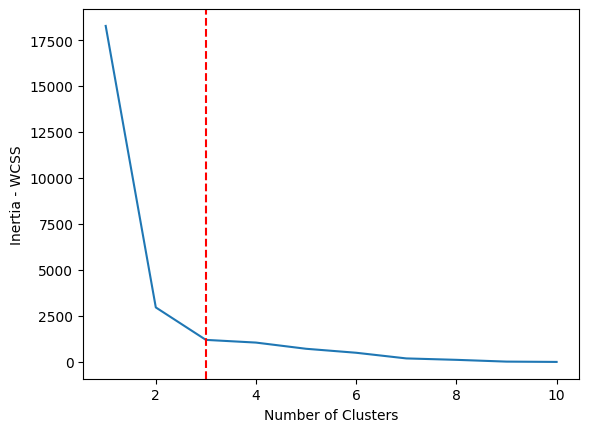

In [117]:
plt.plot(range(1,11), wcss)
plt.axvline(3, linestyle='--', color='r')

plt.xlabel('Number of Clusters')
plt.ylabel('Inertia - WCSS');

Utilizando o valor de $K$ ideal temos os seguintes segmentos:

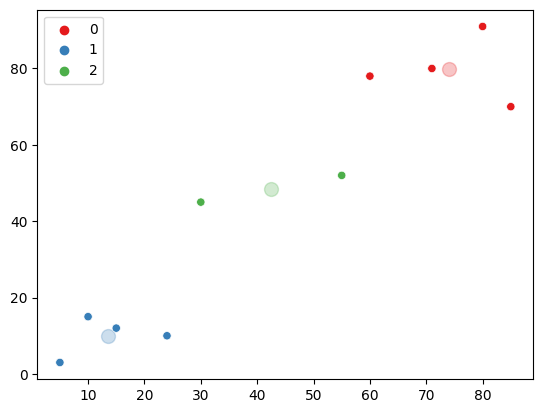

In [121]:
k_best = 3

kmeans = KMeans(n_clusters=k_best, n_init='auto', random_state=42)
kmeans.fit(points)


fig, ax = plt.subplots()

unique_colors = sns.color_palette('Set1', n_colors=k)

# plota as posicoes dos centroides
for i in range(k_best):
    xc, yc = kmeans.cluster_centers_[i]  # coordenadas do i-esimo cluster
    ax.scatter(x=xc, y=yc, s=100, alpha=0.25, c=[unique_colors[i]])


sns.scatterplot(x=xs, y=ys, hue=kmeans.labels_, palette='Set1', ax=ax);

# Aplicando K-Means ao Wine Dataset

In [123]:
from sklearn.datasets import load_wine

In [125]:
df, _ = load_wine(return_X_y=True, as_frame=True)

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [127]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

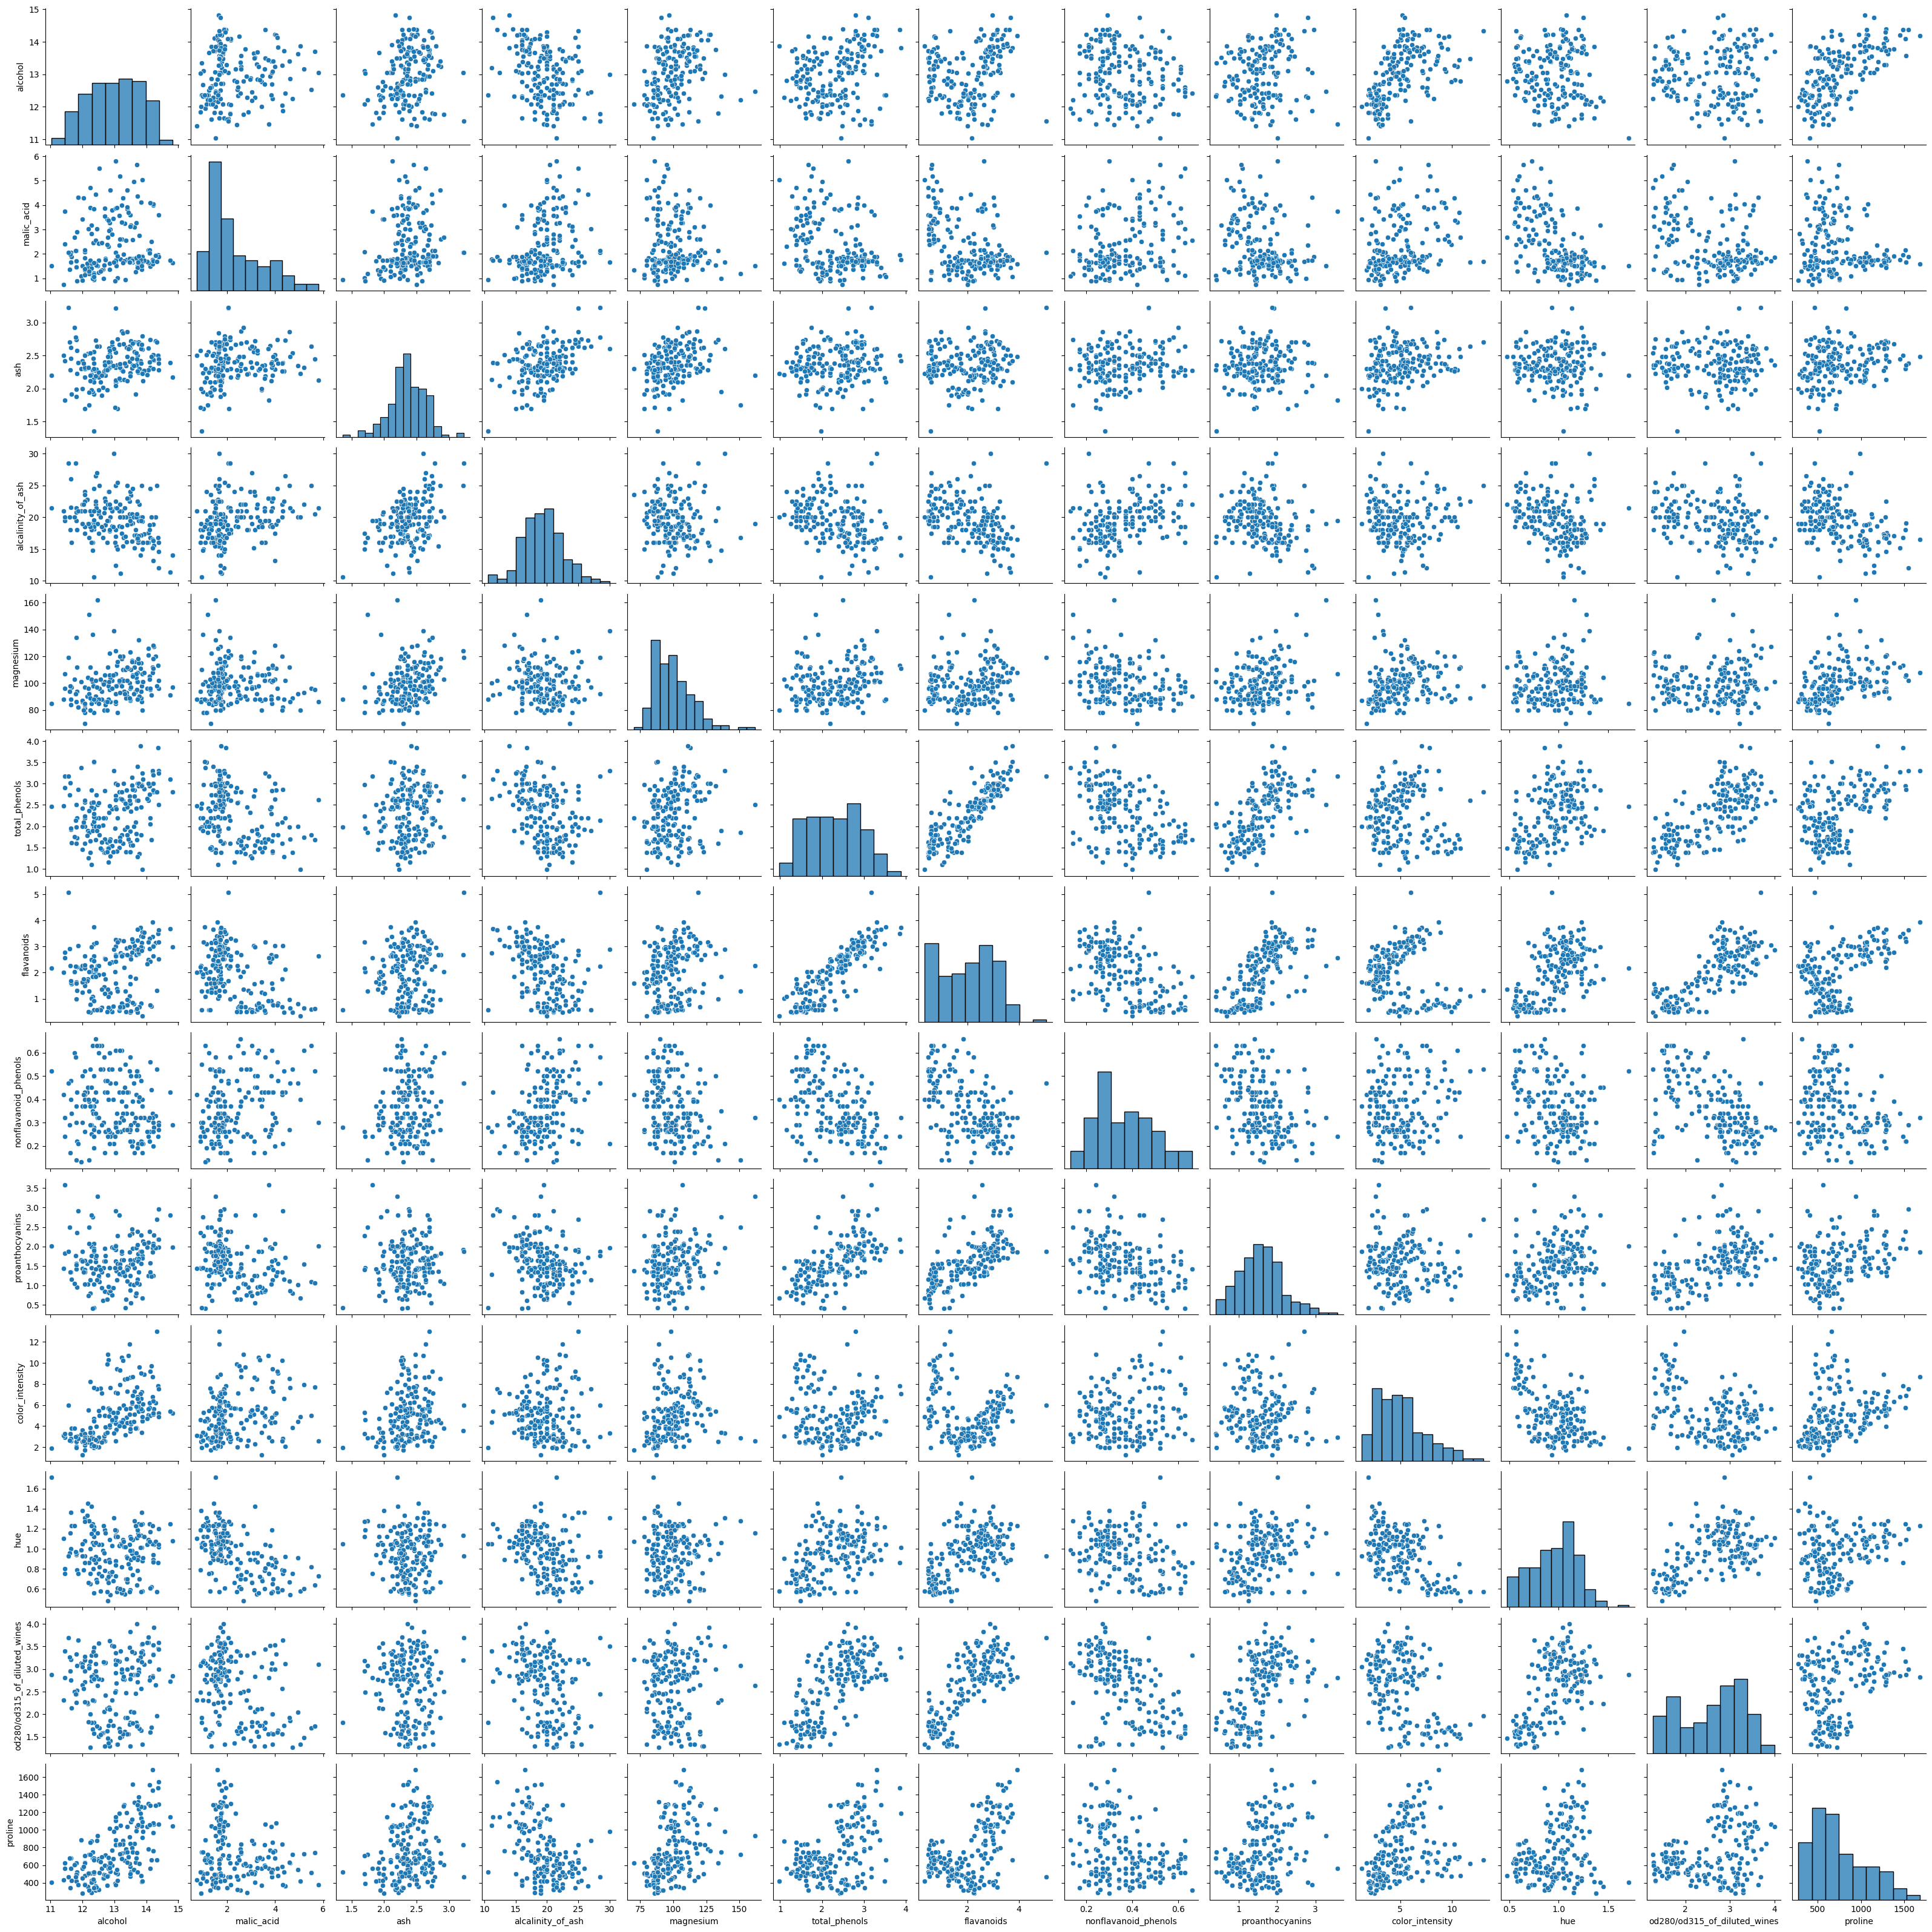

In [129]:
sns.pairplot(df)

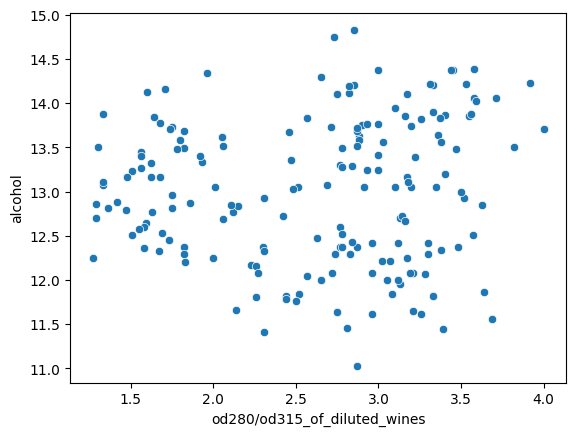

In [135]:
sns.scatterplot(data=df, x='od280/od315_of_diluted_wines', y='alcohol');

In [137]:
X = df[['od280/od315_of_diluted_wines', 'alcohol']]

wcss_wine = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=42)
    kmeans.fit(X)
    
    wcss_wine.append(kmeans.inertia_)

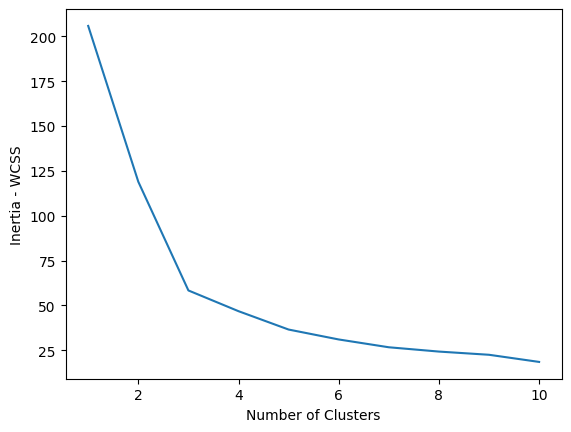

In [139]:
plt.plot(range(1, 11), wcss_wine)

plt.xlabel('Number of Clusters')
plt.ylabel('Inertia - WCSS');

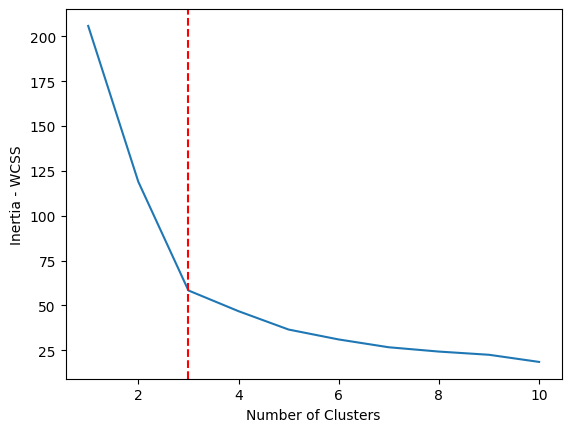

In [140]:
plt.plot(range(1, 11), wcss_wine)
plt.axvline(3, linestyle='--', color='r')

plt.xlabel('Number of Clusters')
plt.ylabel('Inertia - WCSS');

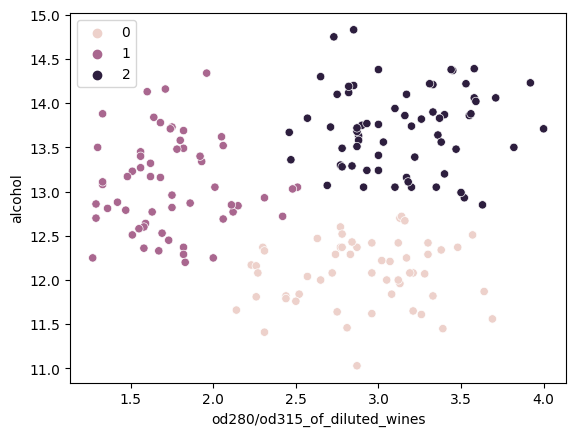

In [142]:
kmeans_wine = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans_wine.fit(X)

sns.scatterplot(data=df, x='od280/od315_of_diluted_wines', y='alcohol', hue=kmeans_wine.labels_);